In [ ]:
from PIEMD import PIEMD
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import w0waCDM

In [2]:
z_lens = 0.3
z_source = 2.0
half_range = 30
n_pixel = 500

pot_x = 0  # center of the profile (arcsec)
pot_y = 0   # center of the profile (arcsec)
pot_emass = 0.3 #ellipticity of the mass
pot_sigma = 800 #velocity dispersion (km/s)
pot_rc = 1 #core radius (arcsec)
pot_rcut = 50 #cutoff radius (arcsec)
pot_theta = 45 #position angle (degrees)

In [3]:
mass_test = PIEMD(ellipticity=pot_emass, rcut=pot_rcut, rc=pot_rc, sigma=pot_sigma, position_angle=pot_theta/180*np.pi, cx=pot_x, cy=pot_y)

In [4]:
x_vals = np.linspace(-half_range, half_range, n_pixel)
y_vals = np.linspace(-half_range, half_range, n_pixel)
X, Y = np.meshgrid(x_vals, y_vals)

In [5]:
dpl_x_, dpl_y_ = mass_test.dpl(X, Y)
kappa_ = mass_test.kappa(X, Y)

cosmo = w0waCDM(H0=70.0, Om0=0.3, Ode0=0.7, w0=-1.0, wa=0.0)
dlsds = cosmo.angular_diameter_distance_z1z2(z_lens, z_source).value / cosmo.angular_diameter_distance(z_source).value

dpl_x = dpl_x_ * dlsds
dpl_y = dpl_y_ * dlsds
kappa = kappa_ * dlsds

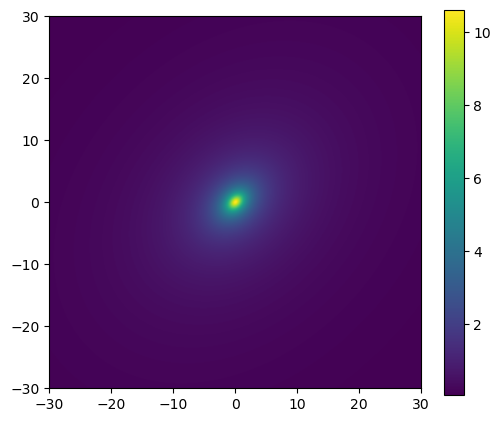

In [6]:
plt.figure(figsize=(6,5),dpi=100)
plt.imshow(kappa,origin='lower',extent=(-half_range,half_range,-half_range,half_range))
plt.colorbar()

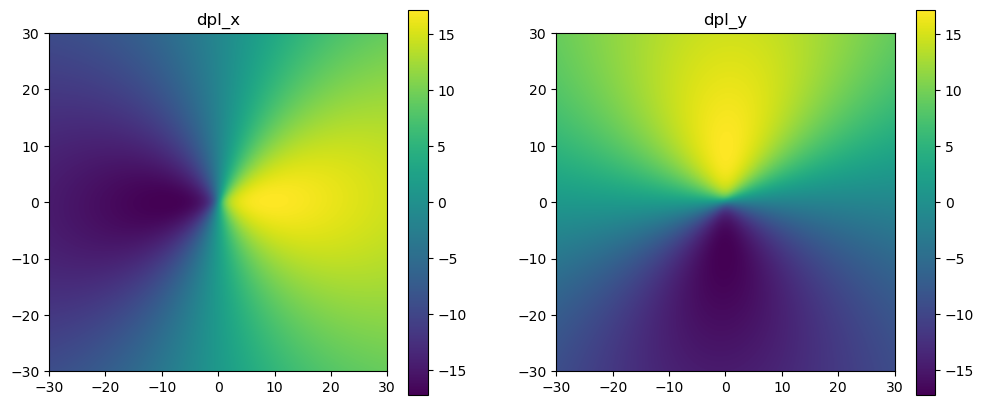

In [7]:
plt.figure(figsize=(12,5),dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(dpl_x,extent=(-half_range,half_range,-half_range,half_range),origin='lower')
plt.colorbar()
plt.title("dpl_x")
plt.subplot(1, 2, 2)
plt.imshow(dpl_y,extent=(-half_range,half_range,-half_range,half_range),origin='lower')
plt.colorbar()
plt.title("dpl_y")
plt.show()